In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy.signal

import pygame

import pandas as pd

pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
from qbstyles import mpl_style

mpl_style(dark=True)

## square wave approximation

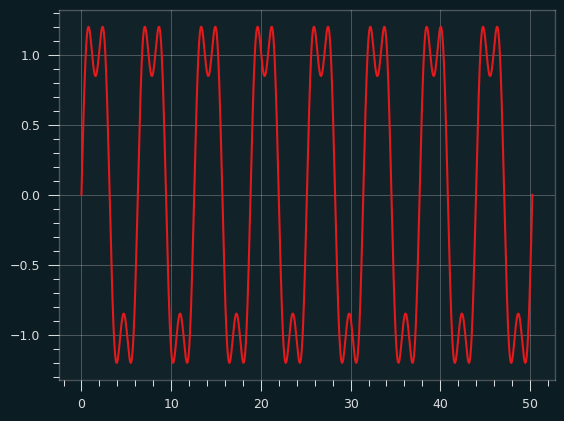

In [4]:

def make_approx(harmonic_numbers, visualize=True, num_waves=8):
    xrange = np.linspace(0, 2 * np.pi * num_waves, 2000) 

    my_wave = np.sin(xrange)
    for harmonic in harmonic_numbers:
        this_one = np.sin(harmonic * xrange) / harmonic
        my_wave += this_one

    if visualize:
        plt.plot(xrange, (4/np.pi) * my_wave)
    return my_wave

_ = make_approx([3])


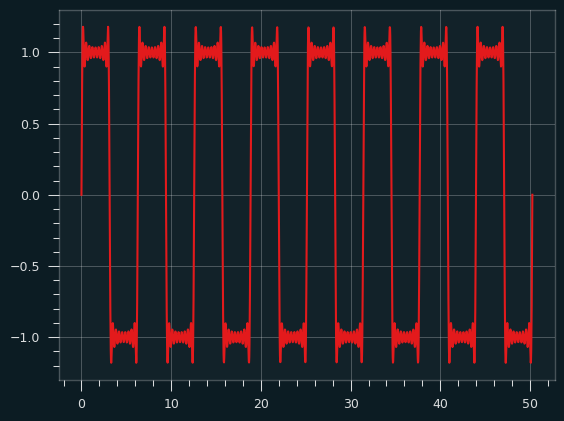

In [5]:
approx_square = make_approx([2 * x + 1 for x in range(1,9)])

## sawtooth wave approximation

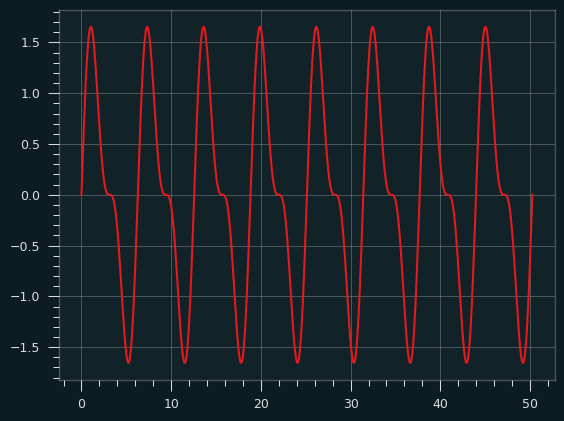

In [6]:

_ = make_approx([2], True)

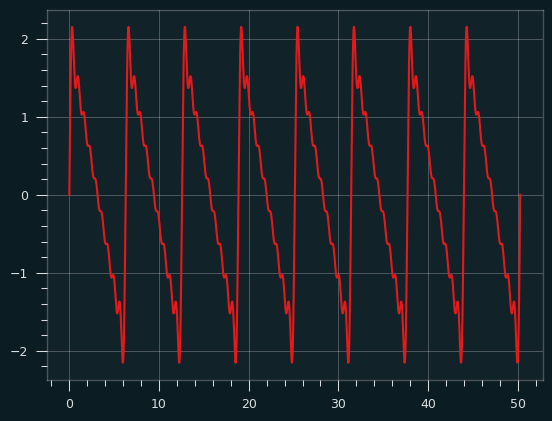

In [7]:
approx_saw = make_approx([x for x in range(2,10)])

### only even harmonics

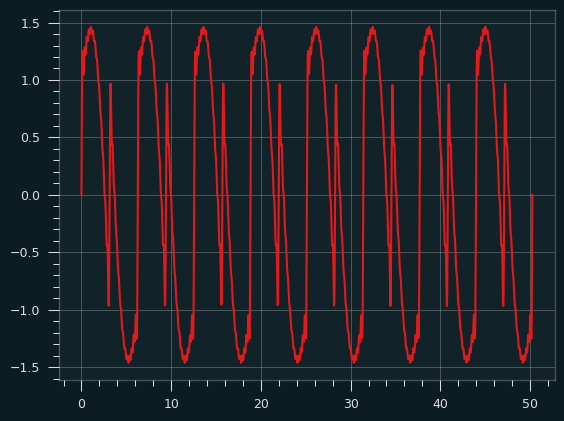

In [8]:
approx_evens = make_approx([2 * x for x in range(1,14)])


it's sort of like a bathtub cuve with a couple of rubber duckies floating in it

<Axes: >

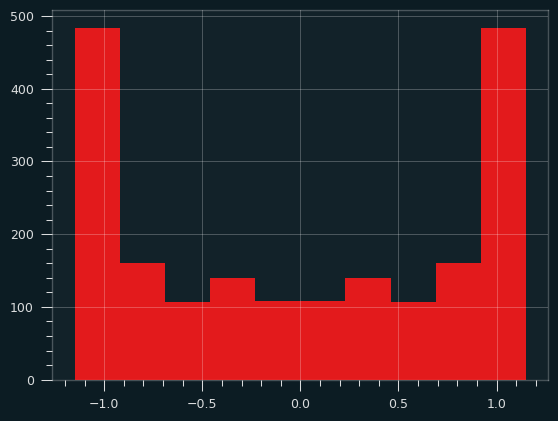

In [9]:
pd.Series(approx_evens).hist()

In [10]:
def insolent_noise(wave):
    # this code is cribbed from https://stackoverflow.com/questions/56592522/python-simple-audio-tone-generator
    pygame.mixer.init(44100,-16,2,512)

    arr = np.array(4000 * wave).astype(np.int16)

    arr2 = np.c_[arr,arr]
    sound = pygame.sndarray.make_sound(arr2)
    sound.play(-1)
    pygame.time.delay(1000)
    sound.stop()

uncomment this to hear my awful thing

In [11]:
#insolent_noise(approx_evens)


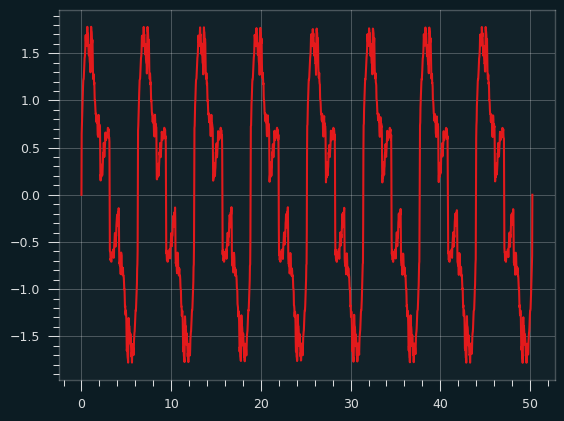

In [12]:
# copied from wikipedia, because I always forget that eg. 57 isn't prime

prime_harmonic_numbers = [2,3,5,7,11,13,17,19,23,29,31,
                          37,41,43,47,53,59,61,67,71,73,79,83,89,97]


primes = make_approx(prime_harmonic_numbers)

In [13]:
#insolent_noise(primes)

<Axes: >

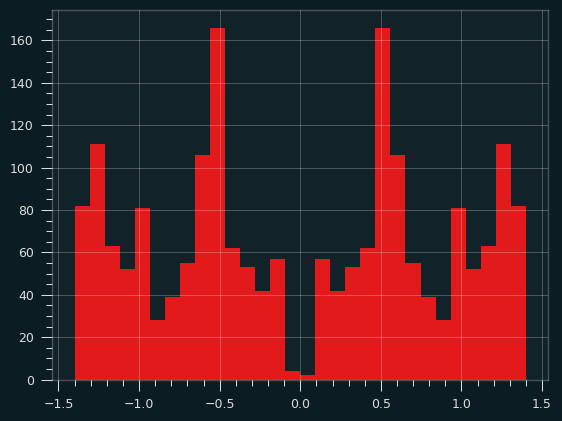

In [14]:
pd.Series(primes).hist(bins=30)

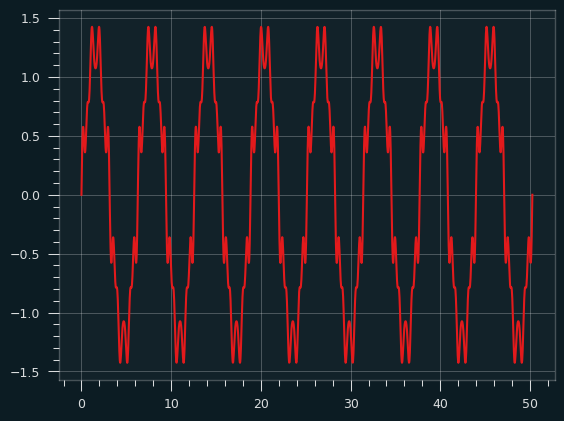

In [15]:
oops_all_dissonance = make_approx([7,11,13])

In [16]:
#insolent_noise(oops_all_dissonance)

## plots of all elements of harmonic series on one graph

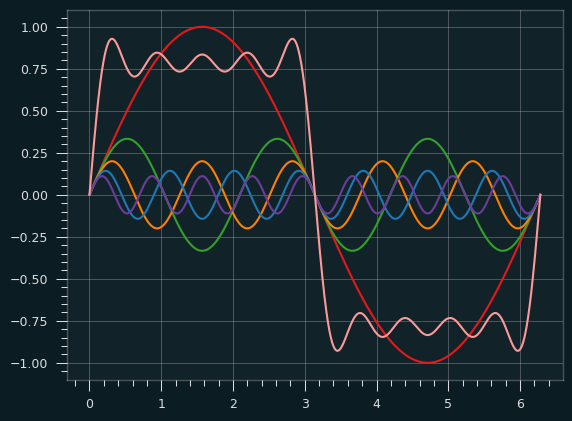

In [17]:
def plot_all_elements(harmonics):
    xrange = np.linspace(0, 2 *  np.pi, 2000)
    fundamental = np.sin(xrange)
    combo = np.sin(xrange)

    plt.plot(xrange, fundamental)

    for h in harmonics:
        harmonic = np.sin(h * xrange) / h
        combo += harmonic
        plt.plot(xrange, harmonic)

    plt.plot(xrange, combo)


plot_all_elements([3,5,7,9])

# temp = np.linspace(0, np.pi, 2000)

# plt.plot(temp, scipy.signal.square(temp))

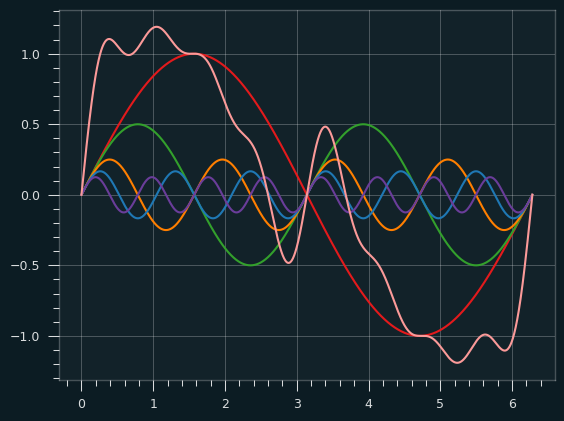

In [18]:
plot_all_elements([2,4,6,8])

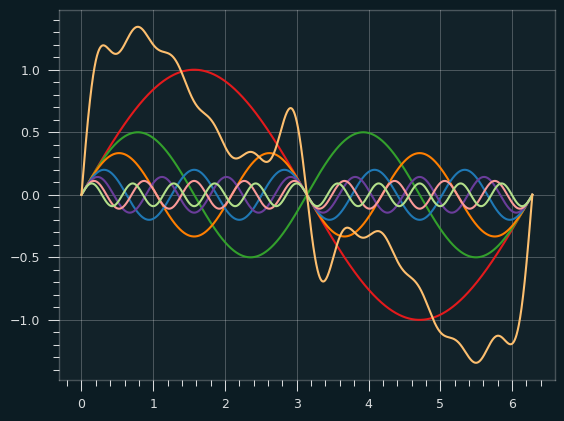

In [19]:
plot_all_elements([2,3,5,7,9,11])

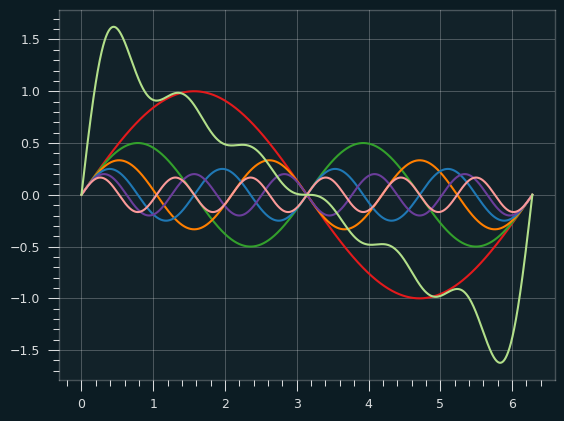

In [20]:
plot_all_elements([ x for x in range(2,7)])

combining harmonics -- what it looks like

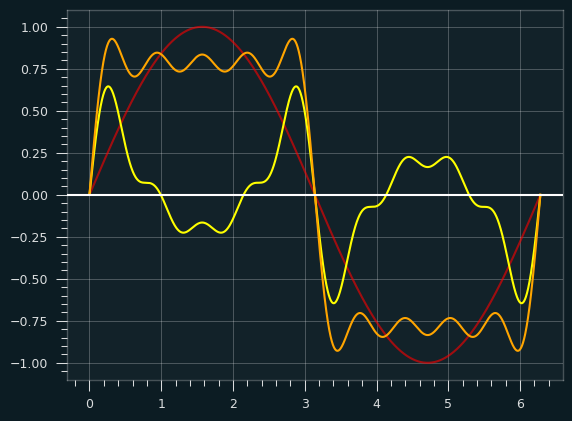

In [21]:
def combine_harmonics(harmonics, return_data=False):

    xrange = np.linspace(0, 2 *  np.pi, 2000)
    fundamental = np.sin(xrange)
    waveform = np.sin(xrange)

    plt.plot(xrange, fundamental, color="red", alpha=.6)

    all_harmonics = np.zeros(2000)

    for h in harmonics:
        harmonic = np.sin(h * xrange) / h
        all_harmonics += harmonic
        waveform += harmonic
        #plt.plot(xrange, harmonic)

    plt.plot(xrange, all_harmonics, color="yellow")

    plt.plot(xrange, waveform, color='orange')
    plt.axhline(0, color='white')
    
    if return_data:
        return waveform


combine_harmonics([3,5,7,9])

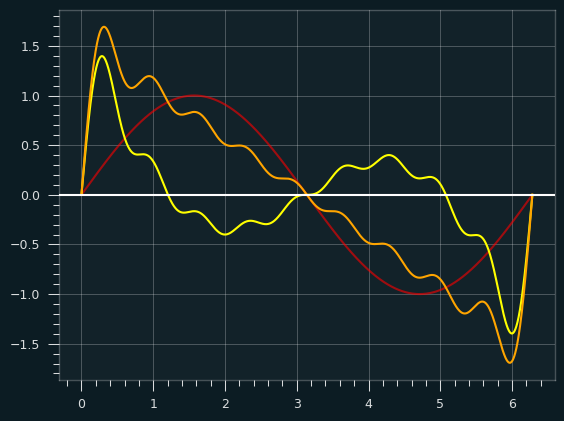

In [22]:
amplitudes = combine_harmonics([x for x in range(2,10)], True)

(array([ 69.,  33.,  64., 160.,  53., 172.,  68., 155.,  87., 139., 139.,
         87., 155.,  68., 172.,  53., 160.,  64.,  33.,  69.]),
 array([-1.07731175, -0.96958058, -0.8618494 , -0.75411823, -0.64638705,
        -0.53865588, -0.4309247 , -0.32319353, -0.21546235, -0.10773118,
         0.        ,  0.10773118,  0.21546235,  0.32319353,  0.4309247 ,
         0.53865588,  0.64638705,  0.75411823,  0.8618494 ,  0.96958058,
         1.07731175]),
 <BarContainer object of 20 artists>)

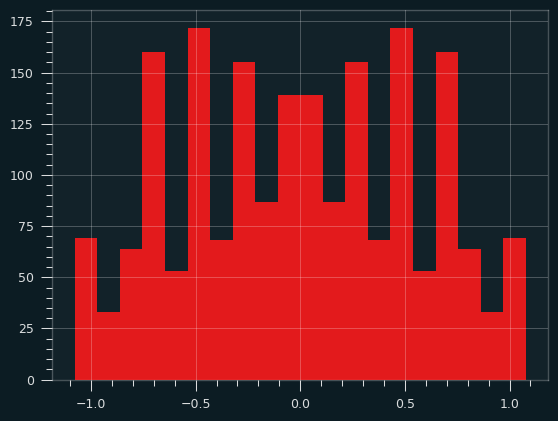

In [29]:
plt.hist(2/np.pi * amplitudes, bins=20)